# **Wheat Production and Global Pricing Dynamics**

**Authors**: Matthew Ocampo, Sam Sims, Judith Haryanto, Sant Sumetpong

## **Introduction**

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_absolute_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import linear_model

## **Analysis**

In [69]:
df1 = pd.read_csv('WTISPLC.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')

merged_df = pd.merge(df1, df2)

merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])
merged_df = merged_df.set_index('DATE')

merged_df.rename(columns={'WTISPLC': 'WTI', 'PWHEAMTUSDM': 'WHEAT (USD)'}, inplace=True)
merged_df.head()

,WTI,WHEAT (USD)
DATE,,
1990-01-01,22.641,167.918579
1990-02-01,22.108,160.937271
1990-03-01,20.418,156.528030
1990-04-01,18.582,159.467529
1990-05-01,18.237,149.179291


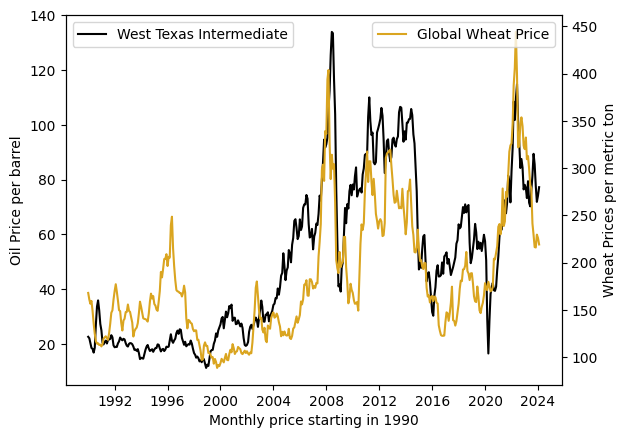

In [70]:
x = merged_df.index
y1 = merged_df['WTI']
y2 = merged_df['WHEAT (USD)']

fig, ax1 = plt.subplots()

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, color ='black', label='West Texas Intermediate')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Oil Price per barrel', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, color = '#DAA520', label='Global Wheat Price')  # the data was collected by the International Montetary Fund
ax2.set_ylabel('Wheat Prices per metric ton', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [71]:
df1 = pd.read_csv('PCU325311325311.csv')
df2 = pd.read_csv('WTISPLC.csv')

merged_df = pd.merge(df1, df2)
merged_df.rename(columns={'PCU325311325311': 'FERT', 'WTISPLC': 'WTI'}, inplace=True)
merged_df.head()

,DATE,FERT,WTI
0,1990-01-01,114.4,22.641
1,1990-02-01,120.1,22.108
2,1990-03-01,119.6,20.418
3,1990-04-01,119.1,18.582
4,1990-05-01,115.8,18.237


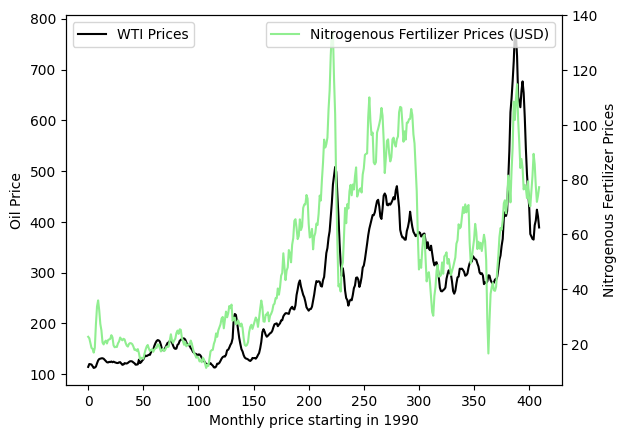

In [72]:
x = merged_df.index
y1 = merged_df['FERT']
y2 = merged_df['WTI']

fig, ax1 = plt.subplots()

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, color ='black', label='WTI Prices')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Oil Price', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, color = 'lightgreen', label='Nitrogenous Fertilizer Prices (USD)') 
ax2.set_ylabel('Nitrogenous Fertilizer Prices', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [73]:
df1 = pd.read_csv('WPUSI024011.csv')
df2 = pd.read_csv('WTISPLC.csv')

merged_df = pd.merge(df1, df2)

merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])
merged_df = merged_df.set_index('DATE')

merged_df.rename(columns={'WPUSI024011': 'AGRI MACH', 'WTISPLC': 'WTI'}, inplace=True)
merged_df.head()

,AGRI MACH,WTI
DATE,,
1990-01-01,122.3,22.641
1990-02-01,122.4,22.108
1990-03-01,122.8,20.418
1990-04-01,123.2,18.582
1990-05-01,123.2,18.237


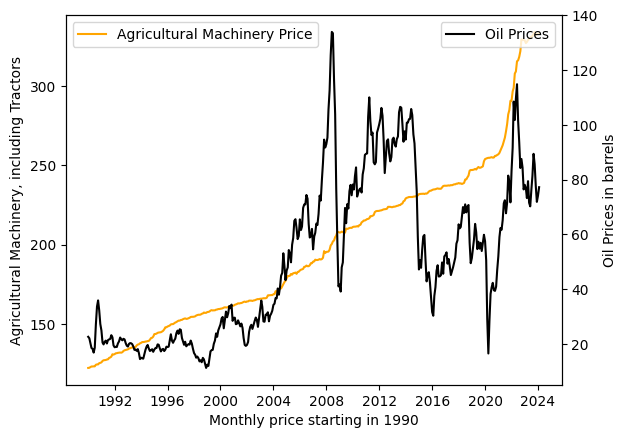

In [74]:
x = merged_df.index
y1 = merged_df['AGRI MACH']
y2 = merged_df['WTI']

fig, ax1 = plt.subplots()

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, color ='orange', label='Agricultural Machinery Price')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Agricultural Machinery, including Tractors', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, color = 'black', label='Oil Prices')  # the data was collected by the International Montetary Fund
ax2.set_ylabel('Oil Prices in barrels', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [75]:
df1 = pd.read_csv('PCU325311325311.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')
merged_df = pd.merge(df1, df2)

merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])
merged_df = merged_df.set_index('DATE')

merged_df.rename(columns={'PCU325311325311': 'FERT', 'PWHEAMTUSDM': 'WHEAT (USD)'}, inplace=True)
merged_df.head()

,FERT,WHEAT (USD)
DATE,,
1990-01-01,114.4,167.918579
1990-02-01,120.1,160.937271
1990-03-01,119.6,156.528030
1990-04-01,119.1,159.467529
1990-05-01,115.8,149.179291


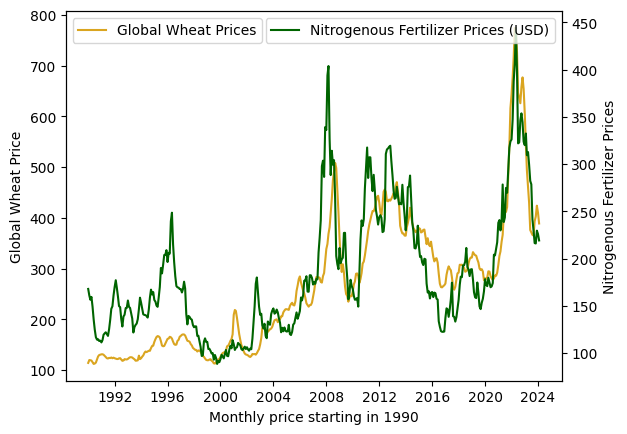

In [76]:
x = merged_df.index
y1 = merged_df['FERT']
y2 = merged_df['WHEAT (USD)']

fig, ax1 = plt.subplots()

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, color ='#DAA520', label='Global Wheat Prices')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Global Wheat Price', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, color = 'darkgreen', label='Nitrogenous Fertilizer Prices (USD)') 
ax2.set_ylabel('Nitrogenous Fertilizer Prices', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [77]:
df1 = pd.read_csv('WPUSI024011.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')

merged_df = pd.merge(df1, df2)

merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])
merged_df = merged_df.set_index('DATE')

merged_df.rename(columns={'WPUSI024011': 'AGRI MACH', 'PWHEAMTUSDM': 'WHEAT (USD)'}, inplace=True)
merged_df.head()

,AGRI MACH,WHEAT (USD)
DATE,,
1990-01-01,122.3,167.918579
1990-02-01,122.4,160.937271
1990-03-01,122.8,156.528030
1990-04-01,123.2,159.467529
1990-05-01,123.2,149.179291


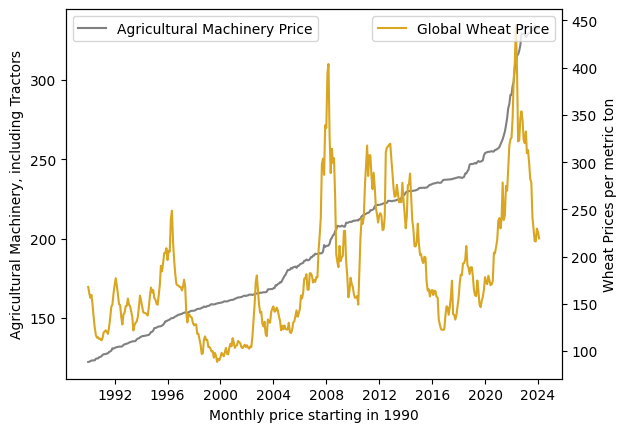

In [78]:
x = merged_df.index
y1 = merged_df['AGRI MACH']
y2 = merged_df['WHEAT (USD)']

fig, ax1 = plt.subplots()

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, color ='Grey', label='Agricultural Machinery Price')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Agricultural Machinery, including Tractors', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, color = '#DAA520', label='Global Wheat Price')  # the data was collected by the International Montetary Fund
ax2.set_ylabel('Wheat Prices per metric ton', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [79]:
df1 = pd.read_csv('Pesticide2003.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')

merged_df = pd.merge(df1, df2)

merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])
merged_df = merged_df.set_index('DATE')

merged_df.rename(columns={'PCU3253203253201': 'PEST', 'PWHEAMTUSDM': 'WHEAT (USD)'}, inplace=True)
merged_df.head()

,PEST,WHEAT (USD)
DATE,,
2003-06-01,100.0,118.157134
2003-07-01,100.0,115.775953
2003-08-01,100.0,133.484492
2003-09-01,100.0,130.649980
2003-10-01,100.4,130.056604


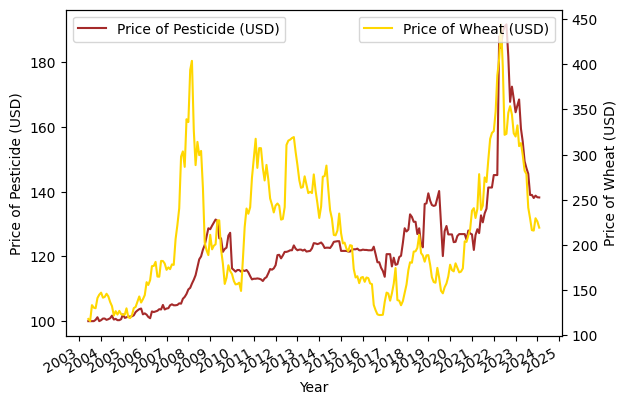

In [80]:
fig, ax1 = plt.subplots()

# use the 'Year' column as the x-axis values
x = merged_df.index 
y1 = merged_df['PEST']
y2 = merged_df['WHEAT (USD)']

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, 'brown', label='Price of Pesticide (USD)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price of Pesticide (USD)', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, 'gold', label='Price of Wheat (USD)') # The data was collected by the International Monetary Fund
ax2.set_ylabel('Price of Wheat (USD)', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig.autofmt_xdate()

plt.show()


In [81]:
price = pd.read_csv('PWHEAMTUSDM.csv')  # WHEAT
seeds_0 = pd.read_csv('seeds.csv')  # seeds

test = pd.merge(price, seeds_0)

lags = range(1, 13)  # just two lags for demonstration.

lagged_df = test.assign(**{f'seed_price (t-{lag})': test['WPU02550304'].shift(-lag) for lag in lags})
lagged_df = lagged_df.rename(columns={"WPU02550304": "seed_price (t)", "PWHEAMTUSDM": "wheat_price"})
lagged_df

,DATE,wheat_price,seed_price (t),seed_price (t-1),seed_price (t-2),seed_price (t-3),seed_price (t-4),seed_price (t-5),seed_price (t-6),seed_price (t-7),seed_price (t-8),seed_price (t-9),seed_price (t-10),seed_price (t-11),seed_price (t-12)
0,1991-06-01,120.151794,100.000,102.400,102.400,102.400,101.700,102.8,102.5,102.4,101.7,101.6,101.5,103.4,103.4
1,1991-07-01,118.209587,102.400,102.400,102.400,101.700,102.800,102.5,102.4,101.7,101.6,101.5,103.4,103.4,103.4
2,1991-08-01,125.326843,102.400,102.400,101.700,102.800,102.500,102.4,101.7,101.6,101.5,103.4,103.4,103.4,103.6
3,1991-09-01,135.372879,102.400,101.700,102.800,102.500,102.400,101.7,101.6,101.5,103.4,103.4,103.4,103.6,102.6
4,1991-10-01,146.887192,101.700,102.800,102.500,102.400,101.700,101.6,101.5,103.4,103.4,103.4,103.6,102.6,102.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,2023-10-01,216.463939,187.977,186.640,187.556,187.396,187.544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,2023-11-01,216.000269,186.640,187.556,187.396,187.544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,2023-12-01,229.633413,187.556,187.396,187.544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,2024-01-01,226.078532,187.396,187.544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
y_lag = lagged_df.wheat_price  # target
col_names = lagged_df.columns.values.tolist()
col_names.remove('DATE')
col_names.remove('wheat_price')
X_lag = lagged_df[col_names]

# run correlations
# for each in col_names, run a correlation with wheat prices

corr_lag = {}
for i, e in enumerate(X_lag):
    corr_lag['t+'+ str(i)] = lagged_df["wheat_price"].corr(lagged_df[e])
    print(f"When lagged by {i} months, the correlation between wheat prices and seed prices is {corr_lag['t+'+str(i)]}.")

When lagged by 0 months, the correlation between wheat prices and seed prices is 0.464270148262589.
When lagged by 1 months, the correlation between wheat prices and seed prices is 0.468595798387648.
When lagged by 2 months, the correlation between wheat prices and seed prices is 0.4722888942772165.
When lagged by 3 months, the correlation between wheat prices and seed prices is 0.476033458974513.
When lagged by 4 months, the correlation between wheat prices and seed prices is 0.4797094109177849.
When lagged by 5 months, the correlation between wheat prices and seed prices is 0.4838935305506062.
When lagged by 6 months, the correlation between wheat prices and seed prices is 0.4879708027006044.
When lagged by 7 months, the correlation between wheat prices and seed prices is 0.4902769864893913.
When lagged by 8 months, the correlation between wheat prices and seed prices is 0.49261460728651596.
When lagged by 9 months, the correlation between wheat prices and seed prices is 0.4953773858

In [92]:
lagged_df_12 = test.assign(**{f'seed_price (t-{12})': test['WPU02550304'].shift(-12)})
lagged_df_12 = lagged_df.rename(columns={"WPU02550304": "seed_price (t)", "PWHEAMTUSDM": "wheat_price"})
lagged_df_12

,DATE,wheat_price,seed_price (t),seed_price (t-12)
0,1991-06-01,120.151794,100.000,103.4
1,1991-07-01,118.209587,102.400,103.4
2,1991-08-01,125.326843,102.400,103.6
3,1991-09-01,135.372879,102.400,102.6
4,1991-10-01,146.887192,101.700,102.7
...,...,...,...,...
388,2023-10-01,216.463939,187.977,NaN
389,2023-11-01,216.000269,186.640,NaN
390,2023-12-01,229.633413,187.556,NaN
391,2024-01-01,226.078532,187.396,NaN


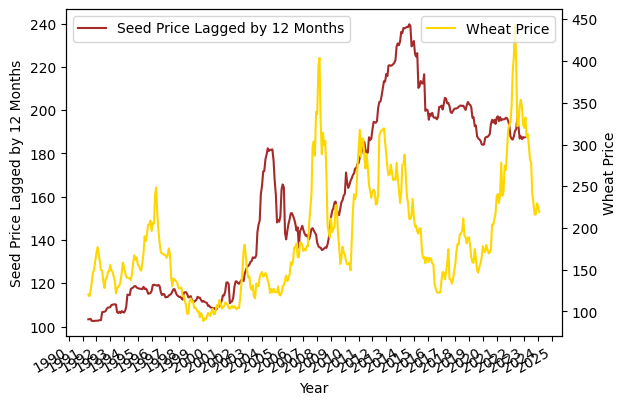

In [97]:
fig, ax1 = plt.subplots()

# use the 'Year' column as the x-axis values
x = lagged_df_12.index 
y1 = lagged_df_12['seed_price (t-12)']
y2 = lagged_df_12['wheat_price']

ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, 'brown', label='Seed Price Lagged by 12 Months')
ax1.set_xlabel('Year')
ax1.set_ylabel('Seed Price Lagged by 12 Months', color='black')

ax2.plot(x, y2, 'gold', label='Wheat Price')
ax2.set_xlabel('Year')
ax2.set_ylabel('Wheat Price', color='black')

# display legend for y-axis
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig.autofmt_xdate()

plt.show()